# LP Drum level control issues

The scope of this document is to investiagte variations of LP drum level during Steam turbine trip

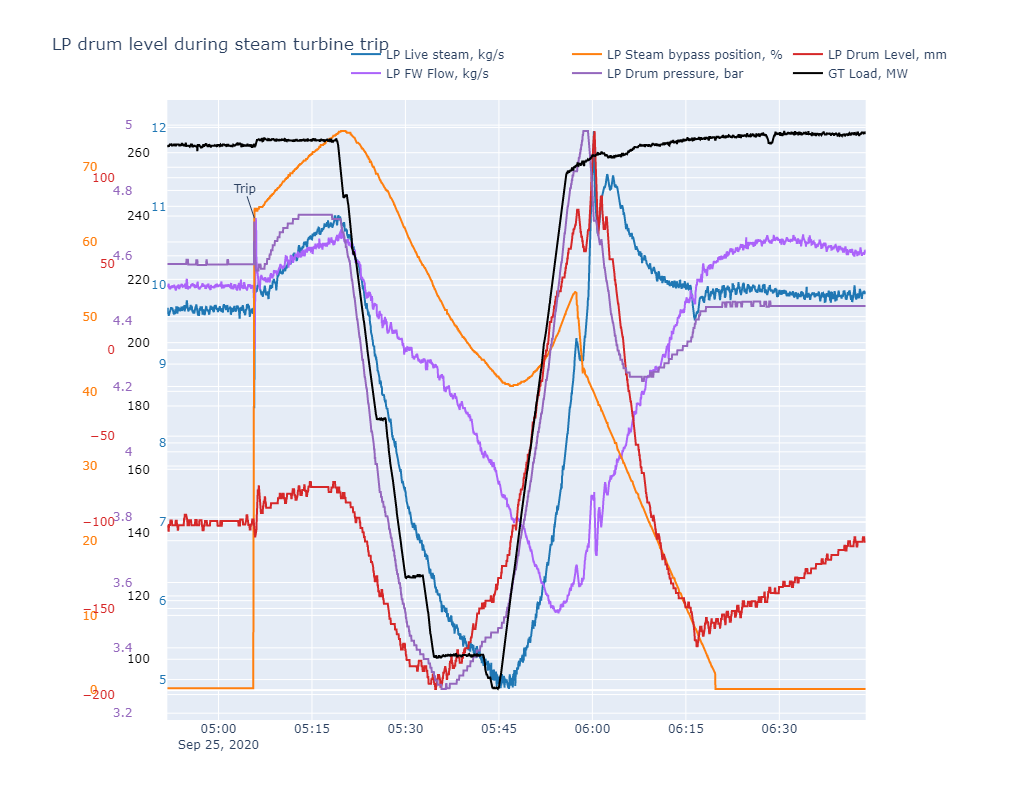

In [12]:
import plotly.graph_objects as go
import pandas as pd
from dateutil import parser

df = pd.read_excel \
    (r'Lpdrumimported.xlsx',
     sheet_name='Trip')

fig = go.Figure()

dates = [parser.parse(date) for date in df ['Date Time']]

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALFIT003-XJ52.UNIT1@NET'], name="LP Live steam, kg/s",
               line=dict(color="#1f77b4")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['POCVLPBYP1-XQ01.UNIT1@NET'], name="LP Steam bypass position, %",
               yaxis='y2', line=dict(color="#ff7f0e")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALLIT001-XJ54.UNIT1@NET'], name="LP Drum Level, mm",
               yaxis='y3', line=dict(color="#d62728")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALFIT035-XJ52.UNIT1@NET'],
               name="LP FW Flow, kg/s",
               yaxis='y'))

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALPIT002-XJ53.UNIT1@NET'],
               name="LP Drum pressure, bar",
               yaxis='y4', line=dict(color="#9467bd")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['01_GT1_CUST_DWATT.UNIT1@NET'],
               name="GT Load, MW",
               yaxis='y5', line=dict(color='black')))

fig.update_layout(
    height=800,
    title_text='LP drum level during steam turbine trip',
    xaxis=dict(
        domain=[0.1, 0.9]
    ),
    yaxis=dict(
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        side="left",
        position=0.02,
        overlaying='y'
    ),
    yaxis3=dict(
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        side="left",
        position=0.04,
        overlaying='y'
    ),
    yaxis4=dict(
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        side="left",
        position=0.06,
        overlaying='y'
    ),
    yaxis5=dict(
        titlefont=dict(
            color="black"
        ),
        tickfont=dict(
            color="black"
        ),
        side="left",
        position=0.08,
        overlaying='y'
    ),
)

fig.update_layout(
    autosize=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1),
    dragmode='drawrect',
    # style of new shapes
    newshape=dict(line_color='yellow',
                  fillcolor='turquoise',
                  opacity=0.5)
)

fig.add_annotation(
            x=parser.parse("09/25/2020 05:05:45"),
            y=10.851,
            text="Trip",
            showarrow=True

)

fig.show(config={'modeBarButtonsToAdd': ['drawline',
                                         'drawopenpath',
                                         'drawclosedpath',
                                         'drawcircle',
                                         'drawrect',
                                         'eraseshape'
                                         ],
                 'editable': "True"})


The following can be observeved:
* Drum pressure jumps from 4.6 bar before trip to 4.7 bar after trip and then drops to previous value (4.6 bars);
* Steam flow is continious, after the trip it is increasing for about 20 minutes from 9.7 kg/s to 10.7 kg/s;
* Bypass opens imidiatly after the trip and continious to control pressure thereafter;
* LP drum level starts to drop after 20 minutes since the steam turbine trip;
* LP drum level drop is strongly correlated with GT load decrease;

Therefore it is suspected that drum level drop is caused by decrease reduced load to the drum and evaporator. Reduced heat flow causes reduced volumetric steam/water ratio, which consiquntly causes drop in drum level. The following theory can be tested by checking drum level behaviour during gas turbine load changes

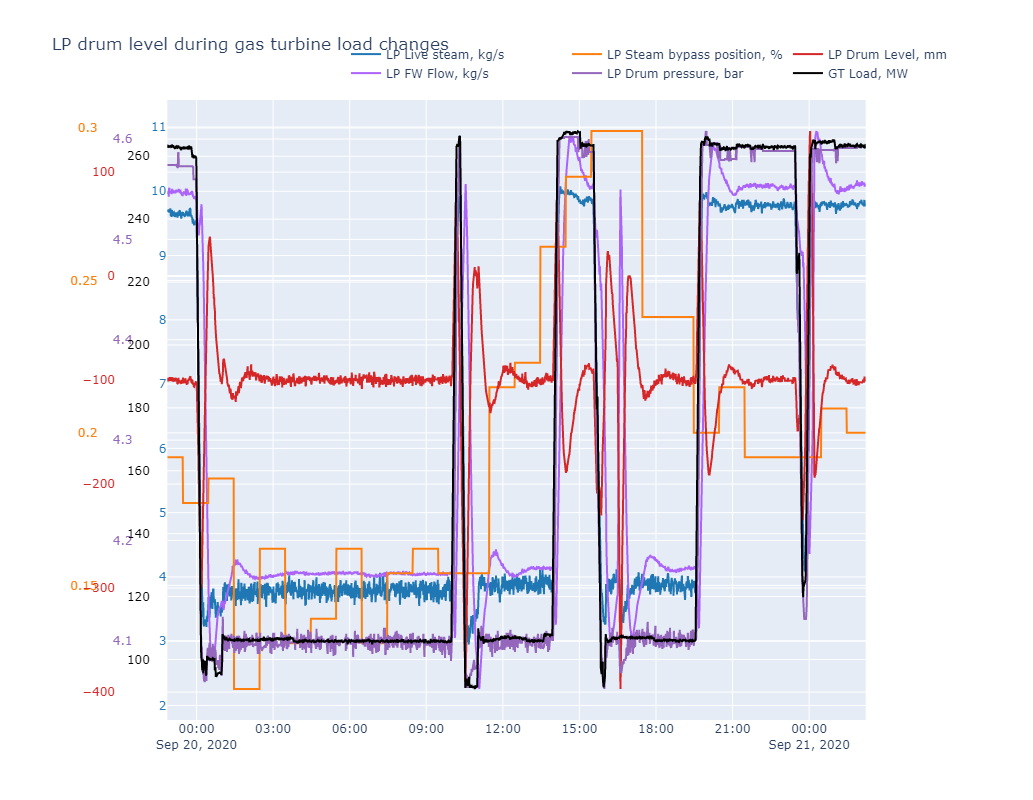

In [11]:
import plotly.graph_objects as go
import pandas as pd
from dateutil import parser

df = pd.read_excel \
    (r'Lpdrumimported.xlsx',
     sheet_name='Variability')

fig = go.Figure()

dates = [parser.parse(date) for date in df ['Date Time']]

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALFIT003-XJ52'], name="LP Live steam, kg/s",
               line=dict(color="#1f77b4")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['POCVLPBYP1-XQ01'], name="LP Steam bypass position, %",
               yaxis='y2', line=dict(color="#ff7f0e")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALLIT001-XJ54'], name="LP Drum Level, mm",
               yaxis='y3', line=dict(color="#d62728")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALFIT035-XJ52'],
               name="LP FW Flow, kg/s",
               yaxis='y'))

fig.add_trace(
    go.Scatter(x=dates, y=df ['3ALPIT002-XJ53'],
               name="LP Drum pressure, bar",
               yaxis='y4', line=dict(color="#9467bd")))

fig.add_trace(
    go.Scatter(x=dates, y=df ['01_GT1_CUST_DWATT'],
               name="GT Load, MW",
               yaxis='y5', line=dict(color='black')))

fig.update_layout(
    height=800,
    title_text='LP drum level during gas turbine load changes',
    xaxis=dict(
        domain=[0.1, 0.9]
    ),
    yaxis=dict(
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="free",
        side="left",
        position=0.02,
        overlaying='y'
    ),
    yaxis3=dict(
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        side="left",
        position=0.04,
        overlaying='y'
    ),
    yaxis4=dict(
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        side="left",
        position=0.06,
        overlaying='y'
    ),
    yaxis5=dict(
        titlefont=dict(
            color="black"
        ),
        tickfont=dict(
            color="black"
        ),
        side="left",
        position=0.08,
        overlaying='y'
    ),
)

fig.update_layout(
    autosize=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1),
    dragmode='drawrect',
    # style of new shapes
    newshape=dict(line_color='yellow',
                  fillcolor='turquoise',
                  opacity=0.5)
)



fig.show(config={'modeBarButtonsToAdd': ['drawline',
                                         'drawopenpath',
                                         'drawclosedpath',
                                         'drawcircle',
                                         'drawrect',
                                         'eraseshape'
                                         ],
                 'editable': "True"})


The trends above depicts that during gas turbine load changes of 150 MW (from 260 MW to 110 MW) level drops from setpoint value of -100 mm to about -300 mm. During the day 5 time load have changed and during all level dynamics are similar

### Conclusion

LP drum level drop does not correlate with steam turbine drop, but rather with load changes in gas turbine. LP drum level tunning activities maybe required